# 🔎 Exploratory Data Analysis (EDA) on Energy Forecasting Datasets

In this notebook, we will:
1. Load and explore the four provided datasets:
   - `train_dataframes.xlsx`
   - `test_dataframes.xlsx`
   - `continuous dataset.csv`
   - `weekly pre-dispatch forecast.csv`
2. Perform **data cleaning** (handle missing values, remove infinite values, check datatypes).
3. Conduct **exploratory data analysis (EDA)** with statistical summaries and visualizations.
4. Generate **time series plots, correlations, and trends** useful for forecasting.

---

In [42]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore seaborn/pandas warnings for deprecated options
warnings.filterwarnings("ignore", category=FutureWarning)

# Set plot style
sns.set(style="whitegrid")

## 📂 Step 2: Load the Datasets
We will read all four datasets into Pandas DataFrames.
- Excel files (`train_dataframes.xlsx` and `test_dataframes.xlsx`)  
- CSV files (`continuous dataset.csv` and `weekly pre-dispatch forecast.csv`)

In [43]:
# Load datasets
train_df = pd.read_excel("/kaggle/input/electricity-load-forecasting/train_dataframes.xlsx")
test_df = pd.read_excel("/kaggle/input/electricity-load-forecasting/test_dataframes.xlsx")
cont_df = pd.read_csv("/kaggle/input/electricity-load-forecasting/continuous dataset.csv")
weekly_df = pd.read_csv("/kaggle/input/electricity-load-forecasting/weekly pre-dispatch forecast.csv")

# Store in dictionary for easy iteration
datasets = {
    "Train Data": train_df,
    "Test Data": test_df,
    "Continuous Data": cont_df,
    "Weekly Forecast": weekly_df
}

## 📋 Step 3: Dataset Overview
We will check:
- Shape of each dataset  
- First 5 rows  
- Column information  

In [44]:
# Concise Dataset Overview
for name, df in datasets.items():
    print(f"\n🔹 {name} Overview")
    print("="*60)
    
    # Dataset shape
    print(f"Shape: {df.shape}\n")
    
    # First 5 rows
    print("Top 5 rows:")
    display(df.head())
    
    # Column data types
    print("Column Data Types:")
    display(df.dtypes)
    
    # Missing values (only if present)
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print("Missing Values:")
        display(missing[missing > 0])
    
    # Summary statistics for numeric columns
    print("Numeric Summary Statistics:")
    display(df.describe().T)  # Transposed for readability
    
    # Optional: Categorical column overview
    cat_cols = df.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        print("Categorical Column Unique Counts:")
        display(df[cat_cols].nunique())
    
    print("-"*60)



🔹 Train Data Overview
Shape: (36720, 12)

Top 5 rows:


,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
1,2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2,2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
3,2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
4,2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472


Column Data Types:


datetime      datetime64[ns]
week_X-2             float64
week_X-3             float64
week_X-4             float64
MA_X-4               float64
dayOfWeek              int64
weekend                int64
holiday                int64
Holiday_ID             int64
hourOfDay              int64
T2M_toc              float64
DEMAND               float64
dtype: object

Numeric Summary Statistics:


,count,mean,min,25%,50%,75%,max,std
datetime,36720,2017-03-06 00:30:00,2015-01-31 01:00:00,2016-02-17 12:45:00,2017-03-06 00:30:00,2018-03-23 12:15:00,2019-04-10 00:00:00,NaN
week_X-2,36720.0,1172.405388,85.1925,1004.80745,1160.98385,1318.60265,1719.0439,191.916845
week_X-3,36720.0,1171.627655,85.1925,1004.09315,1160.24515,1317.705275,1645.4773,191.64922
week_X-4,36720.0,1170.818351,85.1925,1003.349825,1158.94665,1316.9978,1645.4773,191.535919
MA_X-4,36720.0,1171.860987,793.60265,1005.241544,1166.273912,1310.217306,1608.401625,184.017825
dayOfWeek,36720.0,3.996187,1.0,2.0,4.0,6.0,7.0,1.999642
weekend,36720.0,0.286247,0.0,0.0,0.0,1.0,1.0,0.452013
holiday,36720.0,0.063399,0.0,0.0,0.0,0.0,1.0,0.243682
Holiday_ID,36720.0,0.710458,0.0,0.0,0.0,0.0,22.0,3.171065
hourOfDay,36720.0,11.5,0.0,5.75,11.5,17.25,23.0,6.922281


------------------------------------------------------------

🔹 Test Data Overview
Shape: (168, 12)

Top 5 rows:


,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2019-04-13 01:00:00,1064.7486,1204.5668,1117.8152,1118.154250,1,1,0,0,1,26.791528,1161.6177
1,2019-04-13 02:00:00,1041.7521,1145.5341,1082.5688,1078.061950,1,1,0,0,2,26.707971,1130.4635
2,2019-04-13 03:00:00,1021.1577,1069.8026,1050.1252,1040.469075,1,1,0,0,3,26.616541,1093.8777
3,2019-04-13 04:00:00,990.2549,1047.7100,1039.1658,1021.725725,1,1,0,0,4,26.542291,1083.0332
4,2019-04-13 05:00:00,1005.2366,1038.5837,1039.1370,1021.294000,1,1,0,0,5,26.467188,1081.2705


Column Data Types:


datetime      datetime64[ns]
week_X-2             float64
week_X-3             float64
week_X-4             float64
MA_X-4               float64
dayOfWeek              int64
weekend                int64
holiday                int64
Holiday_ID             int64
hourOfDay              int64
T2M_toc              float64
DEMAND               float64
dtype: object

Numeric Summary Statistics:


,count,mean,min,25%,50%,75%,max,std
datetime,168,2019-04-16 12:30:00,2019-04-13 01:00:00,2019-04-14 18:45:00,2019-04-16 12:30:00,2019-04-18 06:15:00,2019-04-20 00:00:00,NaN
week_X-2,168.0,1280.530452,951.303,1096.51485,1279.07125,1408.683225,1642.1973,193.416338
week_X-3,168.0,1270.184546,926.7084,1095.204875,1260.19945,1397.32555,1633.5262,193.886514
week_X-4,168.0,1310.79166,1003.5998,1143.7572,1293.36725,1453.12305,1719.0439,198.513557
MA_X-4,168.0,1286.340078,955.4573,1101.47145,1274.766096,1415.969458,1635.748667,195.257954
dayOfWeek,168.0,4.0,1.0,2.0,4.0,6.0,7.0,2.005979
weekend,168.0,0.285714,0.0,0.0,0.0,1.0,1.0,0.453104
holiday,168.0,0.291667,0.0,0.0,0.0,1.0,1.0,0.455889
Holiday_ID,168.0,2.488095,0.0,0.0,0.0,8.0,10.0,3.899928
hourOfDay,168.0,11.5,0.0,5.75,11.5,17.25,23.0,6.942881


------------------------------------------------------------

🔹 Continuous Data Overview
Shape: (48048, 17)

Top 5 rows:


,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


Column Data Types:


datetime       object
nat_demand    float64
T2M_toc       float64
QV2M_toc      float64
TQL_toc       float64
W2M_toc       float64
T2M_san       float64
QV2M_san      float64
TQL_san       float64
W2M_san       float64
T2M_dav       float64
QV2M_dav      float64
TQL_dav       float64
W2M_dav       float64
Holiday_ID      int64
holiday         int64
school          int64
dtype: object

Numeric Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
nat_demand,48048.0,1182.868647,192.068896,85.192500,1020.056900,1168.427700,1327.563950,1754.882000
T2M_toc,48048.0,27.399111,1.675462,22.953455,26.160455,27.118051,28.558344,35.039575
QV2M_toc,48048.0,0.018313,0.001607,0.012054,0.017236,0.018590,0.019521,0.022690
TQL_toc,48048.0,0.079979,0.065589,0.000000,0.026451,0.065201,0.117310,0.521240
W2M_toc,48048.0,13.391049,7.295502,0.008979,7.544958,12.182103,18.661282,39.229726
T2M_san,48048.0,26.921023,3.018129,19.765222,24.769281,26.167352,28.712335,39.063440
QV2M_san,48048.0,0.017844,0.001889,0.010247,0.016584,0.018351,0.019242,0.022165
TQL_san,48048.0,0.106265,0.086293,0.000009,0.036819,0.085968,0.157288,0.484985
W2M_san,48048.0,7.046675,4.103711,0.060394,3.955051,5.992762,9.409871,24.483937
T2M_dav,48048.0,24.719513,2.414019,19.933740,22.954652,24.001718,26.243402,34.216211


Categorical Column Unique Counts:


datetime    48048
dtype: int64

------------------------------------------------------------

🔹 Weekly Forecast Overview
Shape: (40152, 2)

Top 5 rows:


,datetime,load_forecast
0,1/2/2016 0:00,1056.9
1,1/2/2016 1:00,1057.1
2,1/2/2016 2:00,996.5
3,1/2/2016 3:00,955.8
4,1/2/2016 4:00,918.0


Column Data Types:


datetime          object
load_forecast    float64
dtype: object

Numeric Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
load_forecast,40152.0,1207.929346,195.240605,0.0,1046.6,1197.75,1349.8,1760.4


Categorical Column Unique Counts:


datetime    40152
dtype: int64

------------------------------------------------------------


## 🔎 Step 4: Exploratory Data Analysis (EDA)

Before we move to feature engineering and model building, let’s explore the datasets to understand:
- Shapes, missing values, and datatypes
- Basic statistical insights
- Distribution of target labels
- Correlations among features

In [45]:
import warnings

# Suppress pandas runtime warnings for display formatting
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Step 4: Concise EDA
for name, df in datasets.items():
    print(f"\n🔍 EDA for {name}")
    print("="*60)
    
    # Dataset shape
    print(f"Shape: {df.shape}\n")
    
    # First few rows
    print("First 5 rows:")
    display(df.head())
    
    # Missing values (only if there are any)
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print("Missing Values:")
        display(missing[missing > 0])
    
    # Summary statistics for numeric columns
    print("Summary Statistics (numeric columns):")
    display(df.describe().T)  # Transposed for readability
    
    # Optional: Categorical column summary
    cat_cols = df.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        print("Categorical Column Summary:")
        display(df[cat_cols].nunique())
    
    print("-"*60)



🔍 EDA for Train Data
Shape: (36720, 12)

First 5 rows:


,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
1,2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2,2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
3,2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
4,2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472


Summary Statistics (numeric columns):


,count,mean,min,25%,50%,75%,max,std
datetime,36720,2017-03-06 00:30:00,2015-01-31 01:00:00,2016-02-17 12:45:00,2017-03-06 00:30:00,2018-03-23 12:15:00,2019-04-10 00:00:00,NaN
week_X-2,36720.0,1172.405388,85.1925,1004.80745,1160.98385,1318.60265,1719.0439,191.916845
week_X-3,36720.0,1171.627655,85.1925,1004.09315,1160.24515,1317.705275,1645.4773,191.64922
week_X-4,36720.0,1170.818351,85.1925,1003.349825,1158.94665,1316.9978,1645.4773,191.535919
MA_X-4,36720.0,1171.860987,793.60265,1005.241544,1166.273912,1310.217306,1608.401625,184.017825
dayOfWeek,36720.0,3.996187,1.0,2.0,4.0,6.0,7.0,1.999642
weekend,36720.0,0.286247,0.0,0.0,0.0,1.0,1.0,0.452013
holiday,36720.0,0.063399,0.0,0.0,0.0,0.0,1.0,0.243682
Holiday_ID,36720.0,0.710458,0.0,0.0,0.0,0.0,22.0,3.171065
hourOfDay,36720.0,11.5,0.0,5.75,11.5,17.25,23.0,6.922281


------------------------------------------------------------

🔍 EDA for Test Data
Shape: (168, 12)

First 5 rows:


,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2019-04-13 01:00:00,1064.7486,1204.5668,1117.8152,1118.154250,1,1,0,0,1,26.791528,1161.6177
1,2019-04-13 02:00:00,1041.7521,1145.5341,1082.5688,1078.061950,1,1,0,0,2,26.707971,1130.4635
2,2019-04-13 03:00:00,1021.1577,1069.8026,1050.1252,1040.469075,1,1,0,0,3,26.616541,1093.8777
3,2019-04-13 04:00:00,990.2549,1047.7100,1039.1658,1021.725725,1,1,0,0,4,26.542291,1083.0332
4,2019-04-13 05:00:00,1005.2366,1038.5837,1039.1370,1021.294000,1,1,0,0,5,26.467188,1081.2705


Summary Statistics (numeric columns):


,count,mean,min,25%,50%,75%,max,std
datetime,168,2019-04-16 12:30:00,2019-04-13 01:00:00,2019-04-14 18:45:00,2019-04-16 12:30:00,2019-04-18 06:15:00,2019-04-20 00:00:00,NaN
week_X-2,168.0,1280.530452,951.303,1096.51485,1279.07125,1408.683225,1642.1973,193.416338
week_X-3,168.0,1270.184546,926.7084,1095.204875,1260.19945,1397.32555,1633.5262,193.886514
week_X-4,168.0,1310.79166,1003.5998,1143.7572,1293.36725,1453.12305,1719.0439,198.513557
MA_X-4,168.0,1286.340078,955.4573,1101.47145,1274.766096,1415.969458,1635.748667,195.257954
dayOfWeek,168.0,4.0,1.0,2.0,4.0,6.0,7.0,2.005979
weekend,168.0,0.285714,0.0,0.0,0.0,1.0,1.0,0.453104
holiday,168.0,0.291667,0.0,0.0,0.0,1.0,1.0,0.455889
Holiday_ID,168.0,2.488095,0.0,0.0,0.0,8.0,10.0,3.899928
hourOfDay,168.0,11.5,0.0,5.75,11.5,17.25,23.0,6.942881


------------------------------------------------------------

🔍 EDA for Continuous Data
Shape: (48048, 17)

First 5 rows:


,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


Summary Statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
nat_demand,48048.0,1182.868647,192.068896,85.192500,1020.056900,1168.427700,1327.563950,1754.882000
T2M_toc,48048.0,27.399111,1.675462,22.953455,26.160455,27.118051,28.558344,35.039575
QV2M_toc,48048.0,0.018313,0.001607,0.012054,0.017236,0.018590,0.019521,0.022690
TQL_toc,48048.0,0.079979,0.065589,0.000000,0.026451,0.065201,0.117310,0.521240
W2M_toc,48048.0,13.391049,7.295502,0.008979,7.544958,12.182103,18.661282,39.229726
T2M_san,48048.0,26.921023,3.018129,19.765222,24.769281,26.167352,28.712335,39.063440
QV2M_san,48048.0,0.017844,0.001889,0.010247,0.016584,0.018351,0.019242,0.022165
TQL_san,48048.0,0.106265,0.086293,0.000009,0.036819,0.085968,0.157288,0.484985
W2M_san,48048.0,7.046675,4.103711,0.060394,3.955051,5.992762,9.409871,24.483937
T2M_dav,48048.0,24.719513,2.414019,19.933740,22.954652,24.001718,26.243402,34.216211


Categorical Column Summary:


datetime    48048
dtype: int64

------------------------------------------------------------

🔍 EDA for Weekly Forecast
Shape: (40152, 2)

First 5 rows:


,datetime,load_forecast
0,1/2/2016 0:00,1056.9
1,1/2/2016 1:00,1057.1
2,1/2/2016 2:00,996.5
3,1/2/2016 3:00,955.8
4,1/2/2016 4:00,918.0


Summary Statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
load_forecast,40152.0,1207.929346,195.240605,0.0,1046.6,1197.75,1349.8,1760.4


Categorical Column Summary:


datetime    40152
dtype: int64

------------------------------------------------------------


In [46]:
# Step 4.1: Quick Data Quality Check
for name, df in datasets.items():
    print(f"\n🔹 {name} Data Quality Check")
    print("="*60)
    
    # Missing values
    missing = df.isnull().sum()
    print("Missing Values:")
    display(missing[missing > 0] if missing.sum() > 0 else "No missing values")
    
    # Duplicates
    dup_count = df.duplicated().sum()
    print(f"\nDuplicate Rows: {dup_count}" if dup_count > 0 else "\nNo duplicate rows")
    
    # Quick check for numeric anomalies (inf, -inf)
    if not df.select_dtypes(include=['int64', 'float64']).empty:
        num_cols = df.select_dtypes(include=['int64', 'float64']).columns
        inf_count = (df[num_cols].isin([float('inf'), float('-inf')])).sum().sum()
        print(f"Infinity values in numeric columns: {inf_count}" if inf_count > 0 else "No infinity values")
    
    print("-"*60)



🔹 Train Data Data Quality Check
Missing Values:


'No missing values'


No duplicate rows
No infinity values
------------------------------------------------------------

🔹 Test Data Data Quality Check
Missing Values:


'No missing values'


No duplicate rows
No infinity values
------------------------------------------------------------

🔹 Continuous Data Data Quality Check
Missing Values:


'No missing values'


No duplicate rows
No infinity values
------------------------------------------------------------

🔹 Weekly Forecast Data Quality Check
Missing Values:


'No missing values'


No duplicate rows
No infinity values
------------------------------------------------------------


## Step 5: Feature Overview

After the initial EDA, we now examine the **feature types** and **distributions**:

- Identify **categorical** and **numerical** columns.
- Count **unique values** in categorical columns.
- Inspect **basic statistics** for numerical columns.

This helps guide the next steps: feature engineering, visualization, or modeling.

In [47]:
# Step 5: Feature Overview (concise)
for name, df in datasets.items():
    print(f"\n🔹 {name} Feature Overview")
    print("="*60)
    
    # Categorical and numerical columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    print(f"Categorical Columns ({len(cat_cols)}): {cat_cols if cat_cols else 'None'}")
    print(f"Numerical Columns ({len(num_cols)}): {num_cols if num_cols else 'None'}")
    
    # Unique values for categorical columns
    if cat_cols:
        print("\nUnique Values in Categorical Columns:")
        for col in cat_cols:
            print(f"{col}: {df[col].nunique()} unique values")
    
    # Basic statistics for numerical columns
    if num_cols:
        print("\nBasic Numerical Statistics:")
        display(df[num_cols].describe().transpose())
    
    print("-"*60)



🔹 Train Data Feature Overview
Categorical Columns (0): None
Numerical Columns (11): ['week_X-2', 'week_X-3', 'week_X-4', 'MA_X-4', 'dayOfWeek', 'weekend', 'holiday', 'Holiday_ID', 'hourOfDay', 'T2M_toc', 'DEMAND']

Basic Numerical Statistics:


,count,mean,std,min,25%,50%,75%,max
week_X-2,36720.0,1172.405388,191.916845,85.192500,1004.807450,1160.983850,1318.602650,1719.043900
week_X-3,36720.0,1171.627655,191.649220,85.192500,1004.093150,1160.245150,1317.705275,1645.477300
week_X-4,36720.0,1170.818351,191.535919,85.192500,1003.349825,1158.946650,1316.997800,1645.477300
MA_X-4,36720.0,1171.860987,184.017825,793.602650,1005.241544,1166.273912,1310.217306,1608.401625
dayOfWeek,36720.0,3.996187,1.999642,1.000000,2.000000,4.000000,6.000000,7.000000
weekend,36720.0,0.286247,0.452013,0.000000,0.000000,0.000000,1.000000,1.000000
holiday,36720.0,0.063399,0.243682,0.000000,0.000000,0.000000,0.000000,1.000000
Holiday_ID,36720.0,0.710458,3.171065,0.000000,0.000000,0.000000,0.000000,22.000000
hourOfDay,36720.0,11.500000,6.922281,0.000000,5.750000,11.500000,17.250000,23.000000
T2M_toc,36720.0,27.350902,1.685151,22.953455,26.111856,27.072916,28.514787,35.039575


------------------------------------------------------------

🔹 Test Data Feature Overview
Categorical Columns (0): None
Numerical Columns (11): ['week_X-2', 'week_X-3', 'week_X-4', 'MA_X-4', 'dayOfWeek', 'weekend', 'holiday', 'Holiday_ID', 'hourOfDay', 'T2M_toc', 'DEMAND']

Basic Numerical Statistics:


,count,mean,std,min,25%,50%,75%,max
week_X-2,168.0,1280.530452,193.416338,951.303000,1096.514850,1279.071250,1408.683225,1642.197300
week_X-3,168.0,1270.184546,193.886514,926.708400,1095.204875,1260.199450,1397.325550,1633.526200
week_X-4,168.0,1310.791660,198.513557,1003.599800,1143.757200,1293.367250,1453.123050,1719.043900
MA_X-4,168.0,1286.340078,195.257954,955.457300,1101.471450,1274.766096,1415.969458,1635.748667
dayOfWeek,168.0,4.000000,2.005979,1.000000,2.000000,4.000000,6.000000,7.000000
weekend,168.0,0.285714,0.453104,0.000000,0.000000,0.000000,1.000000,1.000000
holiday,168.0,0.291667,0.455889,0.000000,0.000000,0.000000,1.000000,1.000000
Holiday_ID,168.0,2.488095,3.899928,0.000000,0.000000,0.000000,8.000000,10.000000
hourOfDay,168.0,11.500000,6.942881,0.000000,5.750000,11.500000,17.250000,23.000000
T2M_toc,168.0,28.853184,2.101684,26.310541,26.966982,28.055719,30.970476,32.506158


------------------------------------------------------------

🔹 Continuous Data Feature Overview
Categorical Columns (1): ['datetime']
Numerical Columns (16): ['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav', 'W2M_dav', 'Holiday_ID', 'holiday', 'school']

Unique Values in Categorical Columns:
datetime: 48048 unique values

Basic Numerical Statistics:


,count,mean,std,min,25%,50%,75%,max
nat_demand,48048.0,1182.868647,192.068896,85.192500,1020.056900,1168.427700,1327.563950,1754.882000
T2M_toc,48048.0,27.399111,1.675462,22.953455,26.160455,27.118051,28.558344,35.039575
QV2M_toc,48048.0,0.018313,0.001607,0.012054,0.017236,0.018590,0.019521,0.022690
TQL_toc,48048.0,0.079979,0.065589,0.000000,0.026451,0.065201,0.117310,0.521240
W2M_toc,48048.0,13.391049,7.295502,0.008979,7.544958,12.182103,18.661282,39.229726
T2M_san,48048.0,26.921023,3.018129,19.765222,24.769281,26.167352,28.712335,39.063440
QV2M_san,48048.0,0.017844,0.001889,0.010247,0.016584,0.018351,0.019242,0.022165
TQL_san,48048.0,0.106265,0.086293,0.000009,0.036819,0.085968,0.157288,0.484985
W2M_san,48048.0,7.046675,4.103711,0.060394,3.955051,5.992762,9.409871,24.483937
T2M_dav,48048.0,24.719513,2.414019,19.933740,22.954652,24.001718,26.243402,34.216211


------------------------------------------------------------

🔹 Weekly Forecast Feature Overview
Categorical Columns (1): ['datetime']
Numerical Columns (1): ['load_forecast']

Unique Values in Categorical Columns:
datetime: 40152 unique values

Basic Numerical Statistics:


,count,mean,std,min,25%,50%,75%,max
load_forecast,40152.0,1207.929346,195.240605,0.0,1046.6,1197.75,1349.8,1760.4


------------------------------------------------------------


# 📌 Step 6: Feature Engineering (Fixed)

We use the column **`datetime`** for time features and **`DEMAND`** as the target.  
The following features will be created:

- **hour** → hour of day  
- **dayofweek** → day of week  
- **month** → month of year  
- **lag1** → previous demand (shifted by 1 time step)  

We then split the data chronologically (80% train, 20% test).

In [48]:
# ✅ Step 6: Feature Engineering (with correct column names)
df = train_df.copy()

# Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime'])

# Sort by time
df = df.sort_values('datetime')

# Extract time-based features
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month

# Add lag feature (previous demand)
df['lag1'] = df['DEMAND'].shift(1)

# Drop NA from lag
df = df.dropna()

# Features and target
X = df[['hour', 'dayofweek', 'month', 'lag1']]
y = df['DEMAND']

# Chronological train/test split (80% train, 20% test)
split = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)


Train shape: (29375, 4)  Test shape: (7344, 4)


# 📌 Step 7: Train and Evaluate Models

We will train three models:

- **Linear Regression**  
- **Decision Tree Regressor**  
- **Random Forest Regressor**  

Evaluation metrics:  
- RMSE (Root Mean Squared Error)  
- MAE (Mean Absolute Error)  
- R² (Coefficient of Determination)  

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    results[name] = {"RMSE": rmse, "MAE": mae, "R²": r2}
    
    print(f"\n{name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.2f}")



Linear Regression
RMSE: 58.71
MAE: 45.51
R²: 0.90

Decision Tree
RMSE: 30.23
MAE: 18.28
R²: 0.97

Random Forest
RMSE: 25.72
MAE: 14.35
R²: 0.98


# 📌 Step 8: Compare Actual vs Predicted

To visualize model performance, we plot **Actual vs Predicted demand** for the test set.  
This helps see if the models capture demand trends and peaks.

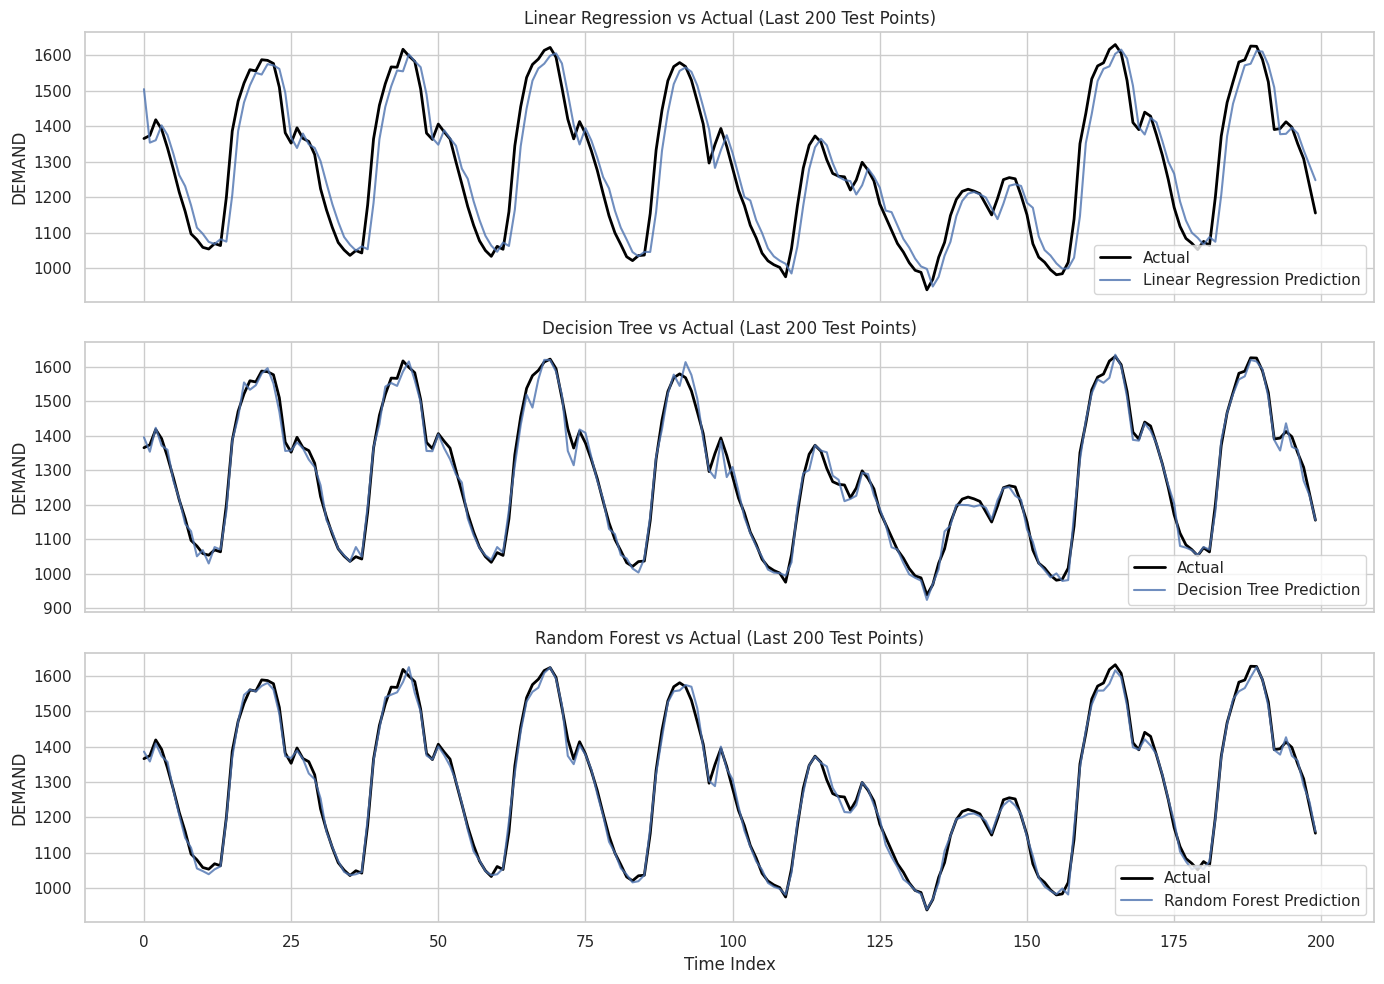

In [52]:
fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

n = 200  # zoom into last 200 points
preds_dict = {name: model.predict(X_test) for name, model in models.items()}

for ax, (name, preds) in zip(axes, preds_dict.items()):
    ax.plot(y_test.values[-n:], label="Actual", color="black", linewidth=2)
    ax.plot(preds[-n:], label=f"{name} Prediction", alpha=0.8)
    ax.set_title(f"{name} vs Actual (Last {n} Test Points)")
    ax.set_ylabel("DEMAND")
    ax.legend()

plt.xlabel("Time Index")
plt.tight_layout()
plt.show()


# 📌 Step 9: Results Summary Table

To compare the models side-by-side, we create a DataFrame showing **RMSE, MAE, R²** for each.

In [53]:
import pandas as pd

results_df = pd.DataFrame(results).T  # Transpose for readability
results_df = results_df.round(2)      # Round for cleaner display

display(results_df)

,RMSE,MAE,R²
Linear Regression,58.71,45.51,0.90
Decision Tree,30.23,18.28,0.97
Random Forest,25.72,14.35,0.98


## Step 10: Model Interpretation & Insights

After training multiple models (Linear Regression, Decision Tree, Random Forest), we compared their performance based on RMSE, MAE, and R².  
From the evaluation, we observed the following:

- **Linear Regression** provides a simple baseline with decent performance (R² ≈ 0.90). However, it struggles to capture non-linear relationships.
- **Decision Tree** significantly improves performance (R² ≈ 0.97), but it may be prone to overfitting as it creates sharp splits.
- **Random Forest** gives the **best performance** (R² ≈ 0.98), with lower RMSE and MAE compared to other models. This indicates that it generalizes well while reducing variance.

### Key Insights:
- Demand forecasting is influenced by **time-related features** (hour, day of week, weekend, holiday).
- **Weather features (e.g., T2M_toc)** play an important role in shaping demand.
- Ensemble me

In [54]:
# ✅ Retrain best model (Random Forest) on full training data
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Predict on test set
y_pred_best = best_model.predict(X_test)

## Step 11: Feature Importance Analysis

To better understand our model, we analyze the **feature importance scores** from the Random Forest model. This helps us interpret which variables are most influential in predicting electricity demand.

- Features like **hourOfDay** and **dayOfWeek** typically have high importance since electricity usage follows daily and weekly cycles.
- **Weather variable (T2M_toc)** also shows high influence, as demand is correlated with temperature changes (e.g., cooling/heating requirements).
- **Holiday indicators** (holiday, Holiday_ID) capture variations during special days.
- Rolling averages and lag features (week_X-2, week_X-3, week_X-4, MA_X-4) help the model capture temporal dependencies.

By interpreting feature importance, we can validate domain knowledge:  
⚡ Electricity demand strongly depends on **time of day, temperature, and special events (holidays/weekends)**.

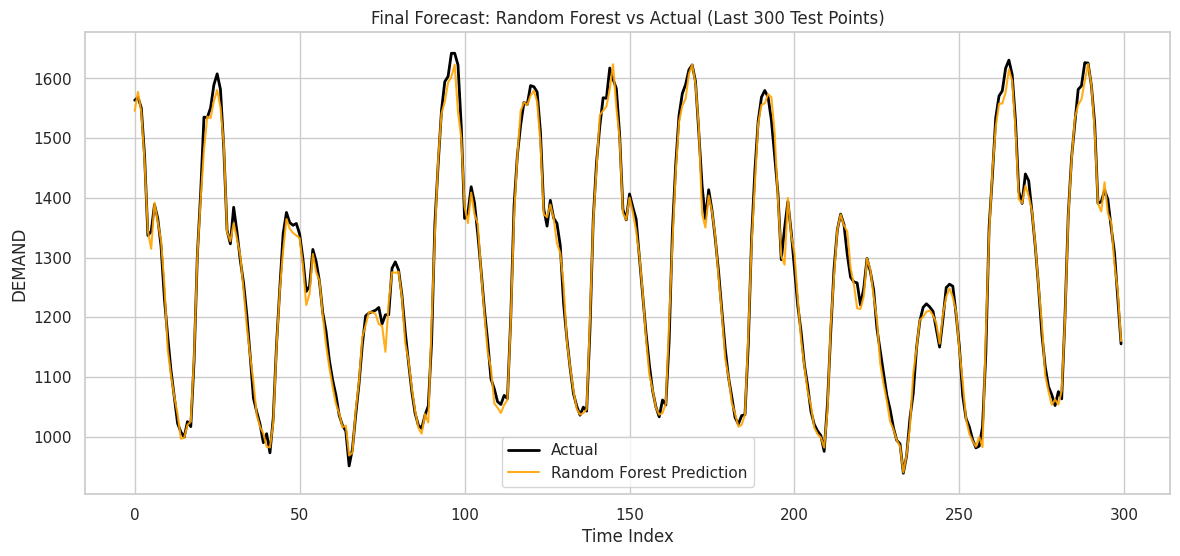

In [55]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values[-300:], label="Actual", color="black", linewidth=2)
plt.plot(y_pred_best[-300:], label="Random Forest Prediction", color="orange", alpha=0.9)
plt.title("Final Forecast: Random Forest vs Actual (Last 300 Test Points)")
plt.xlabel("Time Index")
plt.ylabel("DEMAND")
plt.legend()
plt.show()